In [1]:
import os
import csv
import json
from datetime import datetime

In [2]:
annot_base_dir = '/vision/u/bingbin/EPIC_KITCHENS_2018/annotations/'
obj_base_dir = '/vision/u/bingbin/EPIC_KITCHENS_2018/object_detection_images/'
epic_frame_format = '{:010d}.jpg'

In [3]:
def get_full_path(subset, pid, vid, frame):
  return os.path.join(obj_base_dir, subset, pid, vid, epic_frame_format.format(int(frame)))

def noun_categories():
  fcsv = '/sailhome/bingbin/VOG/dataset/EPIC/annotations/EPIC_noun_classes.csv'
  data = [line for line in csv.reader(open(fcsv, 'r'))]
  header = data[0]
  data = data[1:]
  cats = []
  for line in data:
    cats.append({
      'id': int(line[0])+1,
      'name': line[1],
      'supercategory': line[1]
    })
  return cats

def parse_list(bboxes_str):
  bboxes = bboxes_str.split('),')
  ret = []
  for bbox in bboxes:
    bbox = bbox.replace('(', '').replace(')', '')
    bbox = bbox.replace('[', '').replace(']', '')
    bbox = bbox.replace(' ', '')
    bbox = [int(each) for each in bbox.split(',') if each]
    if bbox:
      ret += bbox,
  return ret

In [5]:
fin = os.path.join(annot_base_dir, 'EPIC_train_object_labels.csv')
fout = os.path.join(annot_base_dir, 'coco_train_object_labels_exists.json')

In [6]:
  with open(fin, 'r') as handle:
    data = [line for line in csv.reader(handle)]
  header = data[0]
  data = data[1:] # ['20', 'bag', 'P01', 'P01_01', '056581', '[(76, 1260, 462, 186)]']
  print('data: type:{} / len:{}'.format(type(data), len(data)))

data: type:<class 'list'> / len:389811


In [7]:
noun_cls, noun, pid, vid, frame, bboxes = data[10]
data[10]

['20', 'bag', 'P01', 'P01_01', '056881', '[(452, 834, 374, 428)]']

In [8]:
full_path = get_full_path('train', pid, vid, frame)


In [9]:
bboxes = parse_list(bboxes)

In [46]:
bboxes
bbox = bboxes[0]
bbox 

[452, 834, 374, 428]

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

(1080, 1920, 3)


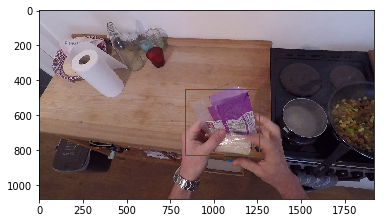

In [48]:
im = np.array(Image.open(full_path))
print(im.shape)
# Create figure and axes
fig,ax = plt.subplots(1)
# Display the image
ax.imshow(im)
# Create a Rectangle patch (bottom left x y), W, H
rect = patches.Rectangle((bbox[1],bbox[0]),bbox[3],bbox[2],linewidth=1,edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
plt.show()

In [50]:
for [noun_cls, noun, pid, vid, frame, bboxes] in data:
    full_path = get_full_path('train', pid, vid, frame)
    im = np.array(Image.open(full_path))
    if im.shape != (1080, 1920, 3):
        print(full_path)

FileNotFoundError: [Errno 2] No such file or directory: '/vision/u/bingbin/EPIC_KITCHENS_2018/object_detection_images/train/P01/P01_08/0000005941.jpg'

(1080, 1920, 3)


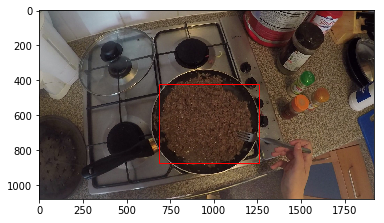

In [14]:
full_path = '/vision/u/bingbin/EPIC_KITCHENS_2018/object_detection_images/train/P02/P02_09/0000130471.jpg'
bbox = [422, 688, 452, 572]
im = np.array(Image.open(full_path))
print(im.shape)
# Create figure and axes
fig,ax = plt.subplots(1)
# Display the image
ax.imshow(im)
# Create a Rectangle patch (bottom left x y), W, H
rect = patches.Rectangle((bbox[1],bbox[0]),bbox[3],bbox[2],linewidth=1,edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
plt.show()